# 房间类型分布  和 课程类型分布

In [35]:
import pandas as pd
import numpy as np
from scipy import linalg
import sys
sys.path.append("/home/coffee/QkidsAutomation")
import os
from qkids import Week
from qkids.Models import Lesson
from schedule import DataFarm
import matplotlib.pyplot as plt
from qkids.DatabasePool import get_odps
odps = get_odps()

In [38]:
# from matplotlib.font_manager import _rebuild
# _rebuild()

In [36]:
data_farm = DataFarm()
df = data_farm.run()

## 房间类型分布

In [9]:
df_room_type = df.sum(axis=1)

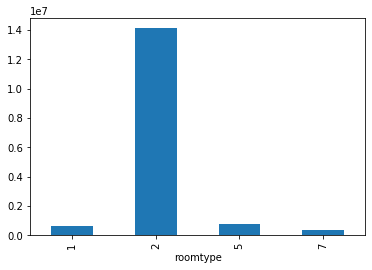

In [12]:
df_room_type.groupby(level=1).sum().plot(kind='bar')

图中显示从这几年来的数据，但2人班和1人班是近期才有的 所以分布不是很均匀。接下里我门看时间中只有（4人班2人班1人班的比例）

In [17]:
a = df_room_type.groupby(level=0).count()
a.loc[a==3].index.min()

Timestamp('2018-03-13 18:30:00')

从2018-03-13 18:30:00 开始同时有1人班 2人班 4人班

In [22]:
df_room_type.name = 'cnt'
df_room_type = df_room_type.reset_index()

In [28]:
df_room_type = df_room_type.loc[df_room_type.begin > '2018-03-13 00:00:00']

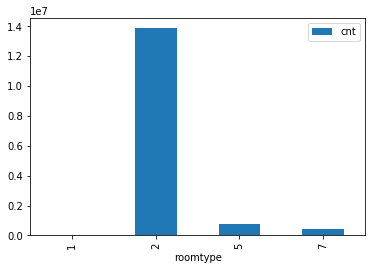

In [31]:
df_room_type.groupby('roomtype').sum().plot(kind='bar')

In [35]:
s = df_room_type.groupby('roomtype').sum()
s/ s.sum()

,cnt
roomtype,
1,0.002451
2,0.918903
5,0.052344
7,0.026303


由图中显示2019-03-13以来 和总的数据没有差别  依然是4人班占主要91%

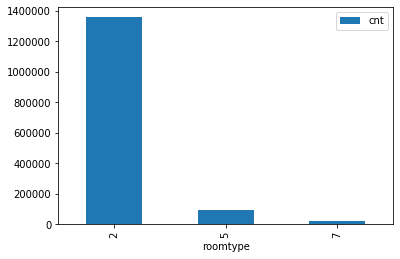

In [36]:
df_room_type = df_room_type.loc[df_room_type.begin > '2020-01-01 00:00:00']
df_room_type.groupby('roomtype').sum().plot(kind='bar')

In [37]:
s = df_room_type.groupby('roomtype').sum()
s/ s.sum()

,cnt
roomtype,
2,0.920753
5,0.062619
7,0.016628


查看2020-01-01以来4人班的比例依然如故，升至有提高到92%，应该和目前疫情大热导致4人班约课比例提高有关

#### 结论： 排课时，根据房间类型的比例，应该尽量突出4人班。除非公司有需求要强推一人班

## 课程分布

In [3]:
df_chapter = df.groupby(level=0).sum()

In [47]:
lesson._df.loc[lesson._df.course.isin([14,15,16])].chapter.unique()

array([ 58,  70,  71,  81,  82,  85,  88,  99, 100, 120, 121])

In [5]:
lesson = Lesson()
df_chapter.columns = [lesson.get_name_by_chapter(c) for c in df_chapter.columns]

### 先看总提数据

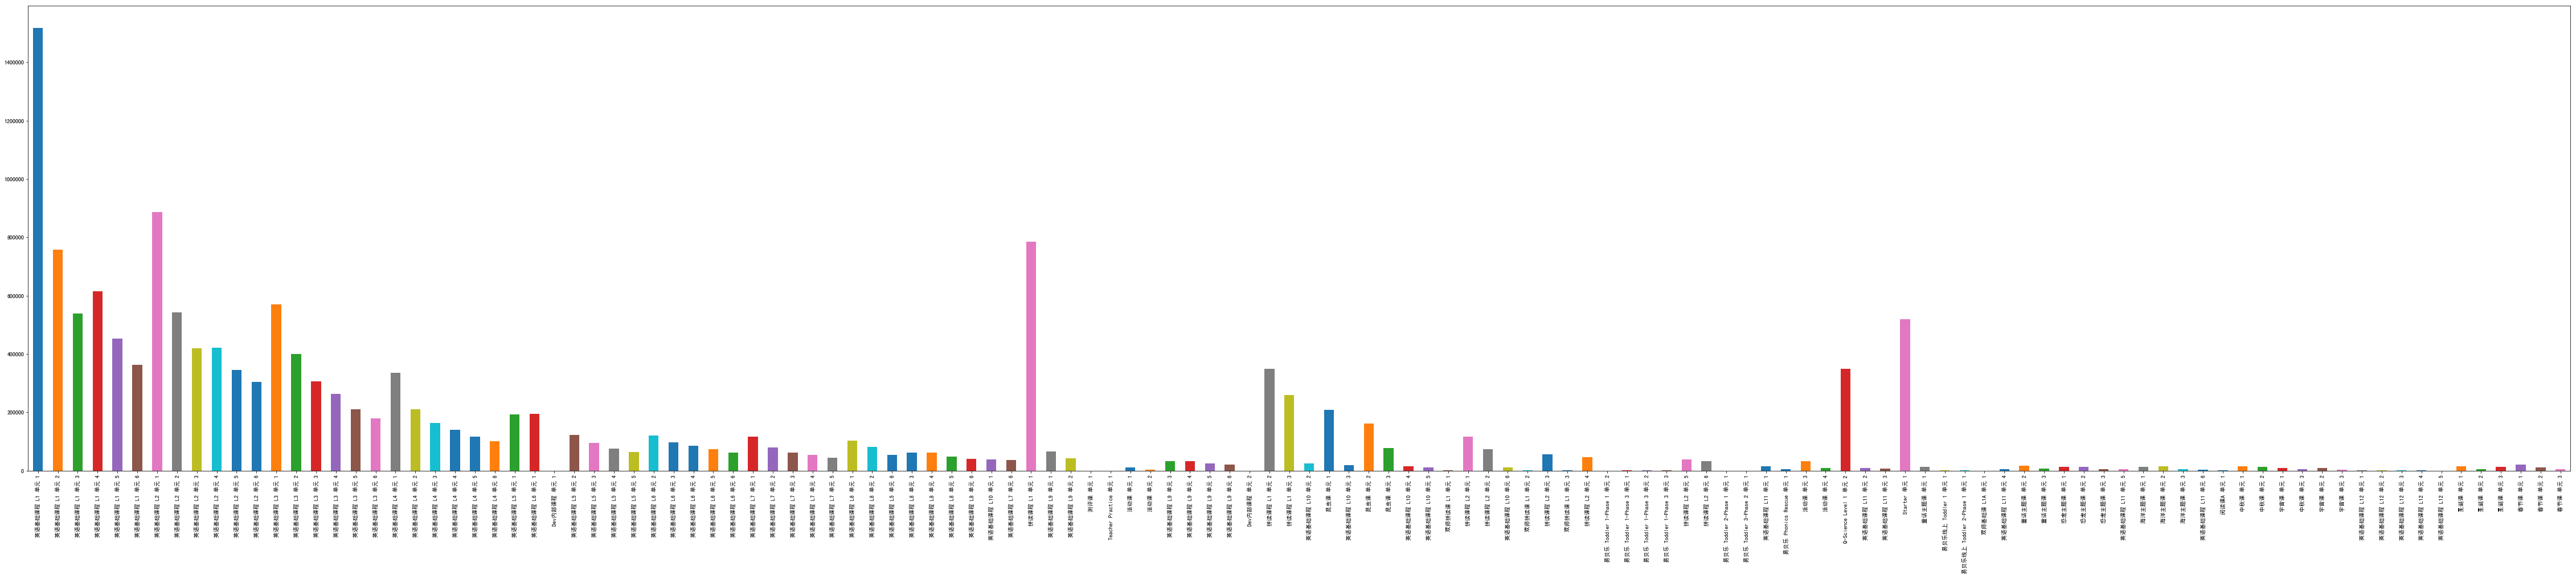

In [39]:
plt.rcParams['font.sans-serif']=['SimHei']
df_chapter.sum().plot(kind='bar', figsize = (80,15))

In [23]:
chapter_cnt = df_chapter.sum()
chapter_cnt.describe()

count    1.280000e+02
mean     1.244415e+05
std      2.177875e+05
min      0.000000e+00
25%      5.900250e+03
50%      3.511550e+04
75%      1.213185e+05
max      1.517753e+06
dtype: float64

#### 按每个单元上课数量 降序

In [27]:
chapter_cnt[chapter_cnt > 3.511550e+04].sort_values(ascending=False)

英语基础课程 L1 单元 1            1517753.0
英语基础课程 L2 单元 1             887036.0
拼读课程 L1 单元 1               785422.0
英语基础课程 L1 单元 2             757384.0
英语基础课程 L1 单元 4             615587.0
英语基础课程 L3 单元 1             570025.0
英语基础课程 L2 单元 2             542147.0
英语基础课程 L1 单元 3             537972.0
Starter 单元 1               518730.0
英语基础课程 L1 单元 5             453088.0
英语基础课程 L2 单元 4             421816.0
英语基础课程 L2 单元 3             419808.0
英语基础课程 L3 单元 2             400627.0
英语基础课程 L1 单元 6             363421.0
拼读课程 L1 单元 2               349269.0
Q-Science Level 1 单元 2     348547.0
英语基础课程 L2 单元 5             345937.0
英语基础课程 L4 单元 1             334526.0
英语基础课程 L3 单元 3             305002.0
英语基础课程 L2 单元 6             304636.0
英语基础课程 L3 单元 4             263187.0
拼读课程 L1 单元 3               259694.0
英语基础课程 L3 单元 5             210066.0
英语基础课程 L4 单元 2             209512.0
昆虫课 单元 1                   207767.0
英语基础课程 L6 单元 1             195336.0
英语基础课程 L5 单元 1             192255.0
英语基础课程 L3 单元 6             1

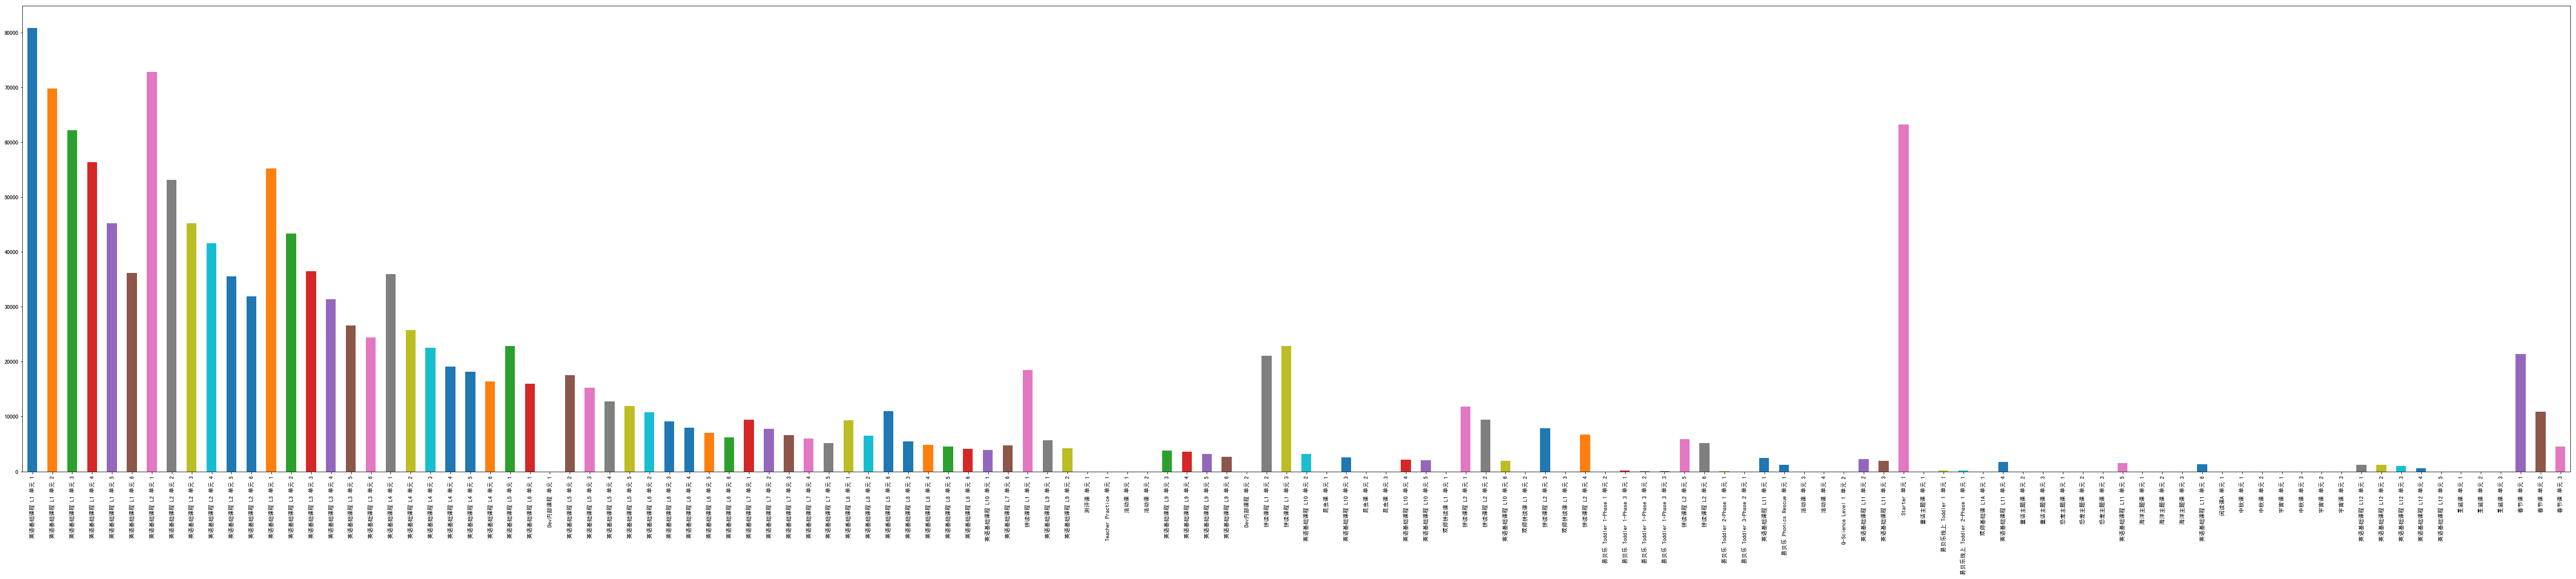

In [40]:
df_chapter.loc['2020-01-01 00:00:00':].sum().plot(kind='bar', figsize = (80,15))